In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [48]:
dat = pd.read_csv("profile.csv", header=None, names=["TraceTime", "SourceTime", "ExecTime", "PluginName"])
dat_n = dat.groupby("PluginName")["ExecTime"].sum().reset_index()
dat_n_sorted = dat_n.sort_values("ExecTime", ascending=False)

dat_s = dat.groupby("PluginName")["SourceTime"].sum().reset_index()
dat_s_sorted = dat_s.sort_values("SourceTime", ascending=False)

top_10 = dat_n_sorted.head(10)

dat_n_sorted.to_csv("results.csv",index = False)
top_10.style.background_gradient() 

,PluginName,ExecTime
10,gruvbox-material.vim,12.462000
13,lspconfig.lua,4.538000
3,cmp.lua,3.164000
14,luasnip.lua,2.404000
1,auto-pairs.vim,1.955000
0,activitywatch.vim,0.807000
19,pandoc.vim,0.730000
16,nvim-treesitter.lua,0.681000
22,telescope.lua,0.529000
9,db_ui.vim,0.493000


In [17]:
dat

,TraceTime,SourceTime,ExecTime,PluginName
0,23.832,0.416,0.416,pandoc.vim
1,53.465,0.147,0.147,luasnip.vim
2,87.711,33.753,2.404,luasnip.lua
3,90.149,1.955,1.955,auto-pairs.vim
4,91.938,0.807,0.807,activitywatch.vim
5,93.793,0.107,0.107,lsp-zero.vim
6,104.801,9.740,3.164,cmp.lua
7,136.823,30.458,4.538,lspconfig.lua
8,148.220,10.995,0.681,nvim-treesitter.lua
9,149.850,1.454,0.024,treesitter-context.vim


In [58]:
dat["PluginName"].unique()

array(['pandoc.vim', 'luasnip.vim', 'luasnip.lua', 'auto-pairs.vim',
       'activitywatch.vim', 'lsp-zero.vim', 'cmp.lua', 'lspconfig.lua',
       'nvim-treesitter.lua', 'treesitter-context.vim',
       'nvim-web-devicons.vim', 'plenary.vim', 'telescope.lua',
       'undotree.vim', 'boxdraw.vim', 'dadbod.vim', 'db_ui.vim',
       'pandoc-syntax-check.vim', 'rsi.vim', 'vim_current_word.vim',
       'cmp_buffer.lua', 'cmp_nvim_lsp.lua', 'cmp_nvim_lua.lua',
       'cmp_path.lua', 'gruvbox_material.vim', 'gruvbox-material.vim'],
      dtype=object)

<Axes: >

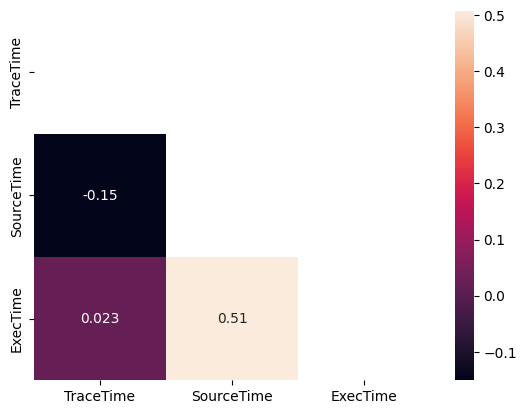

In [12]:
corr_mat = dat.select_dtypes(include='float64').corr()
mask  = np.triu(np.ones_like(corr_mat))
sns.heatmap(data = corr_mat, annot=True, mask = mask)

<Axes: xlabel='TraceTime', ylabel='Density'>

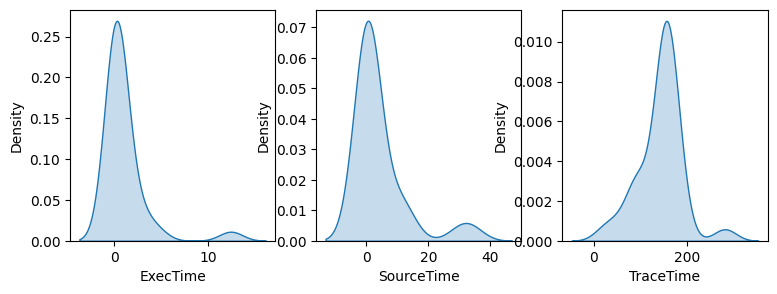

In [31]:
# Distribution
fig, ax = plt.subplots(1,3,figsize=(9,3))
sns.kdeplot(dat['ExecTime'], fill = True, ax=ax[0])
sns.kdeplot(dat['SourceTime'], fill = True, ax=ax[1])
sns.kdeplot(dat['TraceTime'], fill = True, ax=ax[2])


<Axes: >

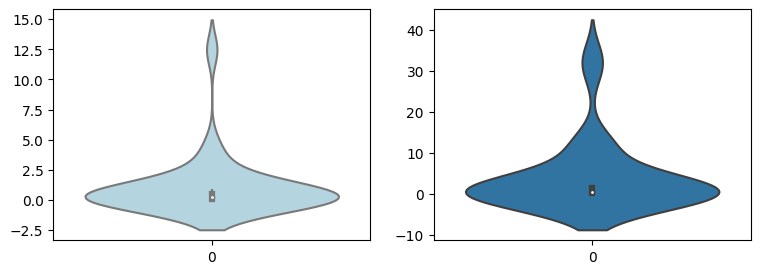

In [52]:
fig, ax = plt.subplots(1,2,figsize=(9,3))
sns.violinplot(dat['ExecTime'], ax=ax[0], color='lightblue')
sns.violinplot(dat['SourceTime'], ax=ax[1])

<Figure size 300x300 with 0 Axes>

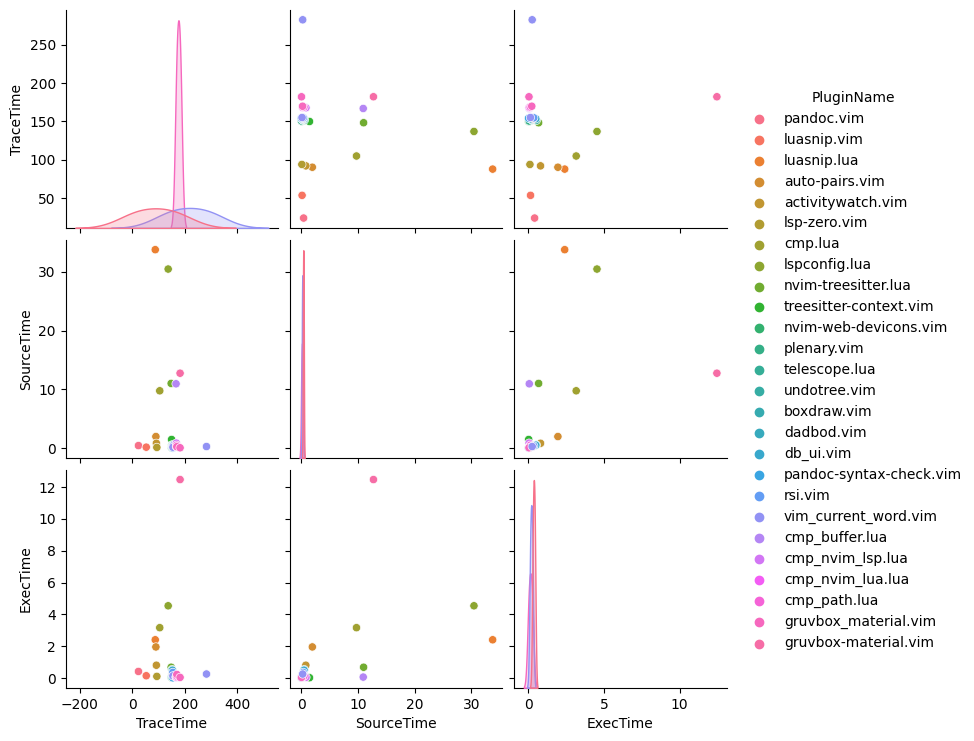

In [63]:
plt.figure(figsize=(3,3))
sns.pairplot(dat, hue='PluginName')
plt.show()

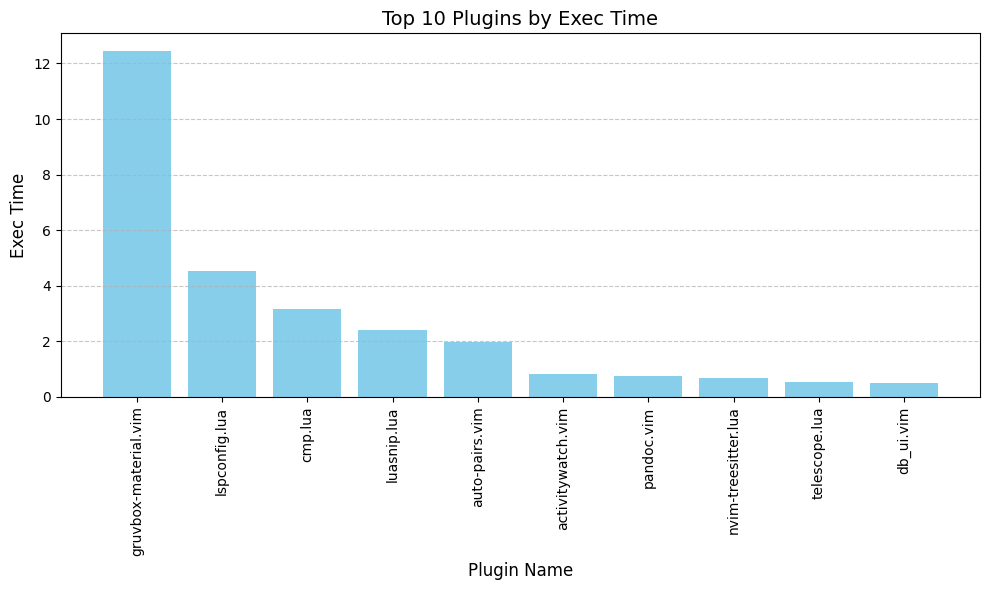

In [3]:
# Create a bar chart with custom styling
plt.figure(figsize=(10, 6))
plt.bar(top_10["PluginName"], top_10["ExecTime"], color="skyblue")
plt.xlabel("Plugin Name", fontsize=12)
plt.ylabel("Exec Time", fontsize=12)
plt.title("Top 10 Plugins by Exec Time", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()



In [53]:
dat_s.style.background_gradient()

,PluginName,SourceTime
0,activitywatch.vim,0.807000
1,auto-pairs.vim,1.955000
2,boxdraw.vim,0.242000
3,cmp.lua,9.740000
4,cmp_buffer.lua,10.930000
5,cmp_nvim_lsp.lua,0.834000
6,cmp_nvim_lua.lua,0.235000
7,cmp_path.lua,0.475000
8,dadbod.vim,0.188000
9,db_ui.vim,0.493000


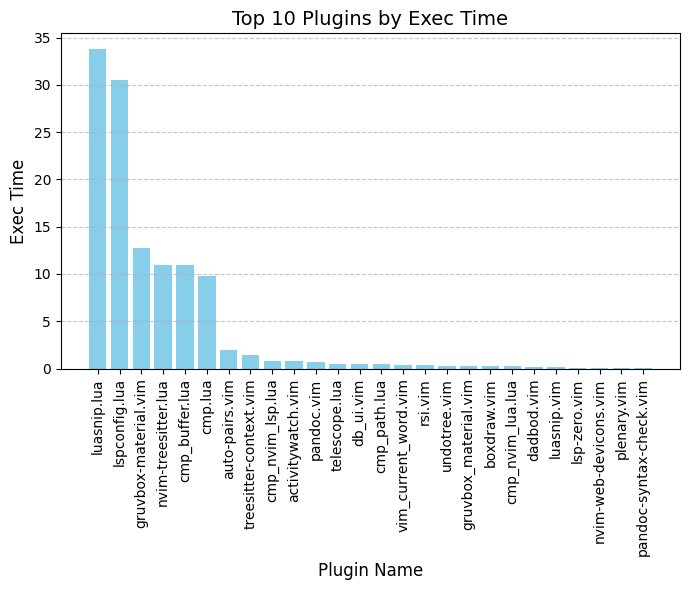

In [42]:
# Create a bar chart with custom styling
plt.figure(figsize=(7, 6))
plt.bar(dat_s_sorted["PluginName"], dat_s_sorted["SourceTime"], color="skyblue")
plt.xlabel("Plugin Name", fontsize=12)
plt.ylabel("Exec Time", fontsize=12)
plt.title("Top 10 Plugins by Exec Time", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()


In [33]:
# Prepare data for the pie chart
top_5 = dat_n_sorted.head(5)
sizes = top_5["ExecTime"]
labels=top_5["PluginName"]
colors = ["#2E5B88", "#497AA7", "#73A4CA", "#9FCAE6", "#B9DDF1"]
explode = [0.1] + [0] * (len(sizes) - 1)  # Explode the first slice for emphasis

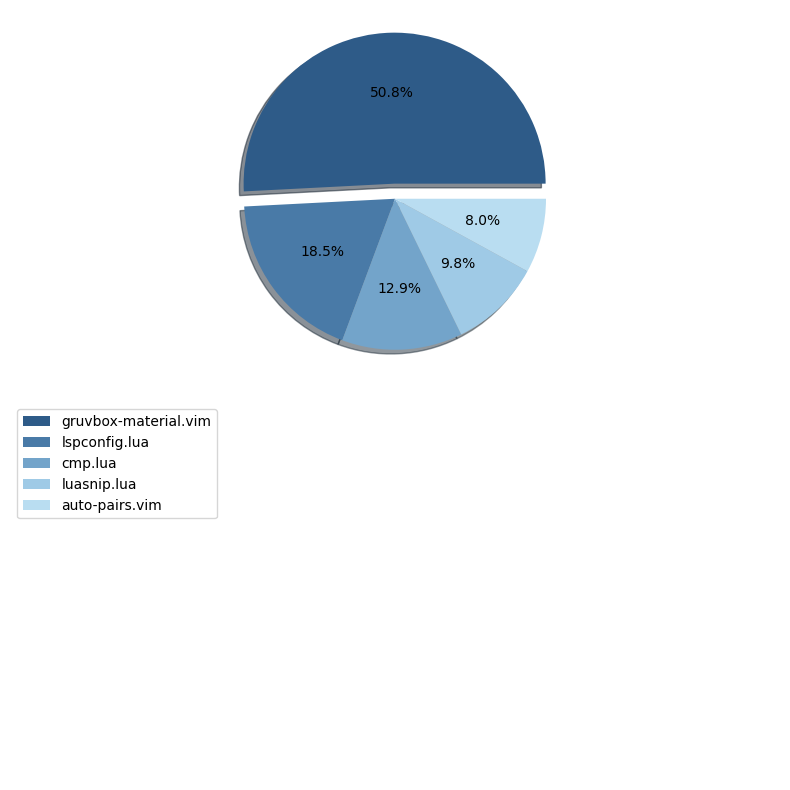

In [32]:
# Plot bar chart
fig = plt.figure(4, figsize = (8,8))
ax = fig.add_subplot(211)
pie = ax.pie(sizes,startangle = 0, explode=explode, shadow = True, autopct = '%1.1f%%',colors = colors)
ax2 = fig.add_subplot(212)
ax2.axis("off")
ax2.legend(pie[0], labels,  loc="upper left")
plt.tight_layout()
